<a href="https://colab.research.google.com/github/BMesc/cafe/blob/master/Caf%C3%A9_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

uri = "https://raw.githubusercontent.com/BMesc/cafe/master/data.csv"

graos = pd.read_csv(uri)

graos.head()

,Area,Roundness,R,G,B
0,1686.5,0.860310,146.814374,91.722222,78.931217
1,1582.5,0.867122,154.086069,99.466282,87.618456
2,1476.0,0.875663,153.118258,95.830282,81.781296
3,1576.5,0.856058,148.290476,91.926190,80.050952
4,1462.5,0.870554,143.559487,85.235897,73.726667


In [ ]:
graos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       162 non-null    float64
 1   Roundness  162 non-null    float64
 2   R          162 non-null    float64
 3   G          162 non-null    float64
 4   B          162 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


In [ ]:
graos.describe()

,Area,Roundness,R,G,B
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1948.947531,0.851203,150.342004,96.656360,84.346037
std,452.402018,0.033489,13.786068,13.223379,11.263030
min,966.500000,0.720496,106.199076,53.076242,51.829804
25%,1611.375000,0.841734,145.214742,91.064012,77.241092
50%,1891.750000,0.860072,152.319542,96.438694,83.527499
75%,2280.500000,0.873347,159.057166,104.461894,91.087386
max,3297.000000,0.899331,177.762170,128.019355,111.851293


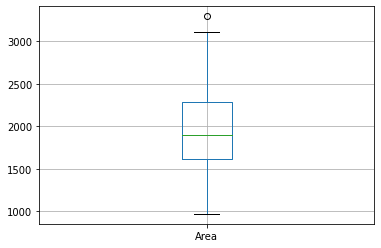

In [ ]:
graos[['Area']].boxplot() #possíveis outliers

In [ ]:
x=graos[['Area', 'Roundness', 'R', 'G', 'B']].values.tolist()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

X = scale(x) #Normalizing the data
modelo = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100000, tol=0.0001) 

modelo.fit(X) #Training the model with K-Means algorithm
labels = modelo.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1
 1 1 1 0 1 1 1 1 1 2 1 2 1 2 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2]


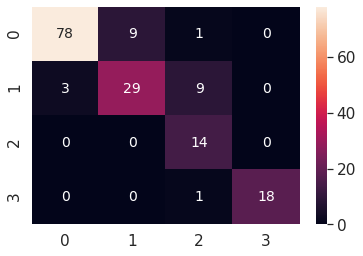

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
y_true = ([0]*88) + ([1]*41) + ([2]*14) + ([3]*19)
cm = confusion_matrix(y_true, labels)
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 14}) # Creating a heatmap for my confusion matrix

plt.show()

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

X = scale(x)

clustering = DBSCAN(eps = 0.1).fit(X)
clustering.labels_